## Regresion Logistica
### Sesion 4

En esta sesión veremos:
 
1. Regresión Logistica
    * Manual
    * sklearn
2. Metricas de un modelo de Clasificacion
    * Accuracy
    * Matriz de Confusion
    * Otras

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
import pandas as pd
import numpy as np
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [3]:
#examinemos glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [4]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


Pronostiquemos household glass usando solo la variable al. Visualicemos la relación para descubrir cómo hacer esto:

Text(0, 0.5, 'household')

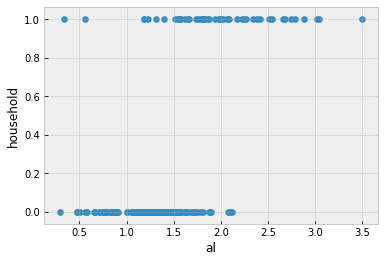

In [5]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [6]:
# ajustemos una regresion lineal
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [7]:
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

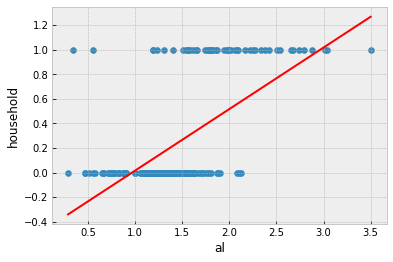

In [8]:
#Pintemos la regresion
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

Si **al=3**, Que clase predecimos? **1**

Si **al=1.5**, Que clase predecimos? **0**

Predecimos la clase 0 para los valores **más bajos** de al, y la clase 1 para los valores **más altos** de al. ¿Cuál es nuestro punto de corte? Alrededor de **al = 2**, porque allí es donde la línea de la regresión lineal cruza el punto medio entre la predicción de la clase 0 y la clase 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

Por lo tanto, diremos que si **hogar_pred> = 0.5**, predecimos una clase de **1**, de lo contrario, predecimos una clase de **0**.


### Si $h_\beta(x)\le 0.5$ entonces $\hat y = 0$ 

### Si $h_\beta(x)> 0.5$ entonces $\hat y = 1$ 

In [9]:
# Entendamos np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where devuelve el primer valor si la condición es True y el segundo valor si la condición es False
print(nums)
np.where(nums > 10, 'big', 'small')

[ 5 15  8]


array(['small', 'big', 'small'], dtype='<U5')

In [10]:
# tansformemos household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0, 0.5, 'household')

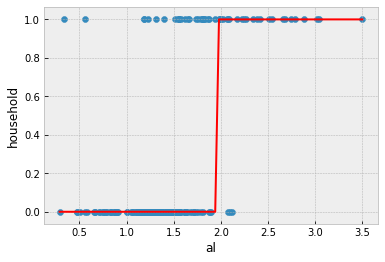

In [11]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Utilizando la regresión logística en su lugar

La regresión logística puede hacer lo que acabamos de hacer:

In [12]:
# ajustemos un modelo de regresion logistica y guardemos las predicciones store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

In [13]:
#Construimos X y Y
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

In [14]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0, 0.5, 'household')

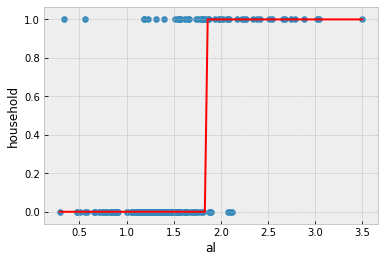

In [15]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

¿Qué pasaría si quisiéramos las **probabilidades pronosticadas** en lugar de solo las **predicciones de clase**, para comprender qué tan seguros estamos de una predicción dada?

In [16]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

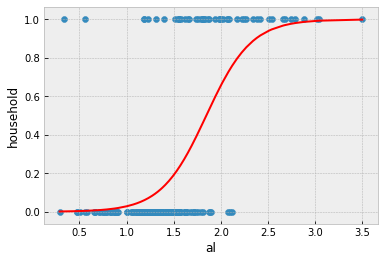

In [17]:
#Pintemos las probabilidades
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [18]:
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]


La primera columna indica la probabilidad predicha de la clase 0, y la segunda columna indica la probabilidad predicha de la clase 1.

## Metricas de un modelo de clasificación

#### Revisión de evaluación de modelos

- Se necesita una forma de elegir entre modelos: diferentes tipos de modelos, tuning parameters and features
- Use un **procedimiento de evaluación del modelo** para estimar qué tan bien el modelo generalizará los datos fuera de la muestra
- Se requiere una **métrica de evaluación del modelo** para cuantificar el rendimiento del modelo

#### Procedimientos de evaluación del modelo

1. **Entrenamiento y pruebas con los mismos datos**
    - "Overfit" o "Sobreajusta" los datos de entrenamiento y no necesariamente generaliza
2. **Train/Test split**
    - Divida el conjunto de datos en dos partes, para que el modelo pueda ser entrenado y probado en diferentes datos
    - Mejor estimación del rendimiento fuera de la muestra, pero sigue siendo una estimación de "alta varianza"
    - Útil debido a su velocidad, simplicidad y flexibilidad.
3. **K-fold cross-validation**
    - Crea sistemáticamente K divisiones de train/test y promedia los resultados juntos
    - Mejor estimación del rendimiento fuera de la muestra.
    - Corre K veces más lento que la división de train/test

### Metricas de Evaluacion de modelos

- **Regresion:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Clasificacion:** Classification accuracy

## Classification accuracy

Este dataset es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del dataset es predecir si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico. Todos los pacientes aquí son mujeres de al menos 21 años de herencia India(Pima).

In [19]:
urlDataset = 'https://github.com/vanejaime/Curso_Python_CD/raw/master/datasets/pima-indians-diabetes-database.csv.zip'
data = pd.read_csv(urlDataset)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Columns
- Pregnancies: Number of times pregnant
- Glucose: Glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure. Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [20]:
cambio_nom = {"Pregnancies":"pregnant", 
              "Glucose":"glucose", 
              "BloodPressure":"bp",
              "SkinThickness":"skin",
              "Insulin":"insulin",
              "BMI":"bmi",
              "DiabetesPedigreeFunction":"pedigree",
              "Age":"age",
              "Outcome":"label"}

data.rename(columns=cambio_nom, inplace=True)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
# Definimos X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = data[feature_cols]
y = data.label

In [22]:
# dividimos X y y en sets de entrenamiento y test
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.25)

In [39]:
print("Tamaño dataset completo: ",len(X))
print("Tamaño train: ",len(X_train))
print("Tamaño test: ",len(X_test))

Tamaño dataset completo:  768
Tamaño train:  576
Tamaño test:  192


In [40]:
#Ajustemos una RL en el set de entrenamiento
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#Hagamos predicciones para el set de prueba
y_pred_class = logreg.predict(X_test)

In [42]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

**Classification accuracy:** porcentaje de predicciones correctas

In [43]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


**Null accuracy:** precisión que podría lograrse prediciendo siempre la clase más frecuente

In [44]:
#examinemos la distribución de la clase del test
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [45]:
#Porcentaje de unos
y_test.mean()

0.3229166666666667

In [46]:
#Porcentaje de ceros
1 - y_test.mean()

0.6770833333333333

In [47]:
# Calculemos null accuracy
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

Comparemos los valores de respuesta **verdaderos/true** y **pronosticados/predicted**

In [48]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusión:**

- Accuracy es la **métrica de clasificación más fácil de entender**
- Pero, no nos dice la **distribución subyacente** de los valores de respuesta
- Y, no nos dice qué **tipos de errores** está cometiendo el clasificador

## Matriz de Confusion

Tabla que describe el rendimiento de un modelo de clasificación.

In [49]:
#IMPORTANTE: primer argumento son valores verdaderos, segundo argumento son valores predichos
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


<img src="09_confusion_matrix_1.png">

- Es una matriz de 2x2 porque hay **2 clases de respuesta**
- El formato que se muestra aquí es **no** universal

**Terminología básica**

- **True Positives (TP):** nosotros predijimos **correctamente**  que **tienen** diabetes
- **True Negatives (TN):** nosotros predijimos **correctamente**  que **no** tienen diabetes
- **False Positives (FP):** nosotros predijimos **incorrectamente**  que **tienen** diabetes (un "error tipo I")
- **False Negatives (FN):** nosotros predijimos **incorrectamente**  que **no** tienen diabetes (un "error tipo II")

In [50]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [53]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print("TP:",TP)
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)

TP: 15
TN: 118
FP: 12
FN: 47


<img src="09_confusion_matrix_2.png">

## Métricas calculadas a partir de una matriz de confusión

**Classification Accuracy:** En general, ¿con qué frecuencia es correcto el clasificador?

In [54]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


**Classification Error:** En general, ¿con qué frecuencia es incorrecto el clasificador?
- También conocido como "Misclassification Rate"

In [56]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


**Sensitivity:** Cuando el valor real es positivo, ¿con qué frecuencia es correcta la predicción?

- ¿Cuán "sensible" es el clasificador para detectar instancias positivas?
- También conocido como ""True Positive Rate" o "Recall"

In [57]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


**Specificity:** Cuando el valor real es negativo, ¿con qué frecuencia es correcta la predicción?

- ¿Cuán "específico" (o "selectivo") es el clasificador al predecir instancias negativas?

In [58]:
print(TN / float(TN + FP))

0.9076923076923077


**False Positive Rate:** Cuando el valor real es negativo, ¿con qué frecuencia es incorrecta la predicción?

In [59]:
print(FP / float(TN + FP))

0.09230769230769231


**Precision:** Cuando se predice un valor positivo, ¿con qué frecuencia es correcta la predicción?

- ¿Cuán "preciso" es el clasificador al predecir instancias positivas?

In [60]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


Se pueden calcular muchas otras métricas: puntaje F1, coeficiente de correlación Matthews, etc

**Que metricas usar**

- Depende del **objetivo de negocio:**

    - **Filtro de spam** (la clase positiva es "spam"): optimice para **precision or specificity** porque los falsos negativos (el spam va a la bandeja de entrada) son más aceptables que los falsos positivos (un correo importante va a la bandeja de spam)

    - **Detector de transacciones fraudulentas** (la clase positiva es "fraude"): optimice para **sensitivity** porque los falsos positivos (transacciones normales marcadas como posibles fraudes) son más aceptables que los falsos negativos (transacciones fraudulentas que no se detectan )

## Ajuste del punto de corte

In [63]:
#primeras 10 respuestas predichas
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [64]:
# 10 probabilidades pronosticadas de pertenencia a la clase
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [65]:
#10 probabilidades predichas para la clase 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [66]:
# guardar las probabilidades predichas para la clase 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

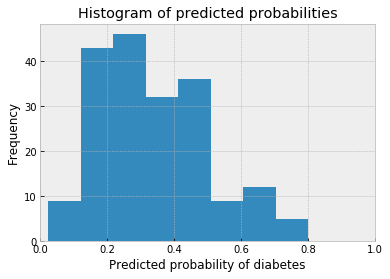

In [67]:
# histograma de las probabilidades predichas
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Disminuya el umbral** para predecir la diabetes con el fin de **aumentar la sensibilidad/sensitivity** del clasificador

In [68]:
# predecir diabetes si la probabilidad pronosticada es mayor a 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [70]:
# 10 primeras probabilidades predichas
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [71]:
#imprime las primeras 10 clases predichas con el umbral inferior
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [72]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]
[[80 50]
 [16 46]]


In [75]:
# sensitivity ha aumentado (solía ser 0.24)
print(46 / float(46 + 16))
# specificity ha disminuido (solía ser 0.91)
print(80 / float(80 + 50))

0.7419354838709677
0.6153846153846154


**Conclusión:**

- **Punto de corte 0.5** se usa por defecto (para problemas binarios) para convertir las probabilidades predichas en predicciones de clase
- El punto de corte se puede **ajustar** para aumentar la sensibilidad o especificidad
- Sensitivity and specificity tienen una **relación inversa**

## Curvas ROC y área bajo la curva (AUC)

**Pregunta:** ¿No sería bueno si pudiéramos ver cómo la sensibilidad y la especificidad se ven afectadas por varios puntos de corte, sin cambiar realmente el punto de corte?

**Respuesta:** ¡Trace la curva ROC!

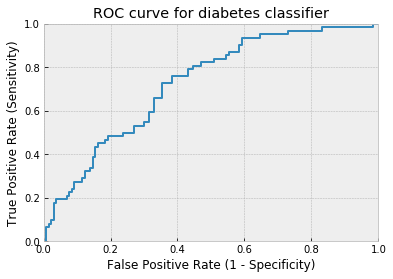

In [76]:
# IMPORTANTE: el primer argumento son valores verdaderos, el segundo argumento es probabilidades pronosticadas
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- La curva ROC puede ayudarlo a **elegir un punto de corte** que equilibre la sensibilidad y la especificidad de una manera que tenga sentido para su contexto particular
- En realidad no puede **ver los puntos de corte** utilizados para generar la curva en la misma curva ROC 

In [77]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [78]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [79]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


AUC es el **porcentaje** de la gráfica ROC que está **debajo de la curva**:

In [81]:
# IMPORTANTE:  el primer argumento son valores verdaderos, el segundo argumento es probabilidades pronosticadas
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


- AUC es útil como un **resumen de un solo número** del rendimiento del clasificador.
- Si elige aleatoriamente una observación positiva y una negativa, AUC representa la probabilidad de que su clasificador asigne una **mayor probabilidad pronosticada** a la observación positiva.
- AUC es útil incluso cuando hay **desequilibrio de clase alta** (unlike classification accuracy)

Notebook construido a partir de notas de la clase Mineria de Datos - Maestría en Analytics -  Universidad de los Andes - Profesor Alejandro Correa